In [1]:
import matplotlib.pyplot
import pandas
from sklearn.cluster import KMeans

In [2]:
#import data
data = pandas.read_csv("C:/Users/User/OneDrive/Documents/Python Scripts/K Means/Customers.csv")

In [3]:
#EDA

import seaborn 

data.describe()


,CustomerID,Age,Income,Index
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


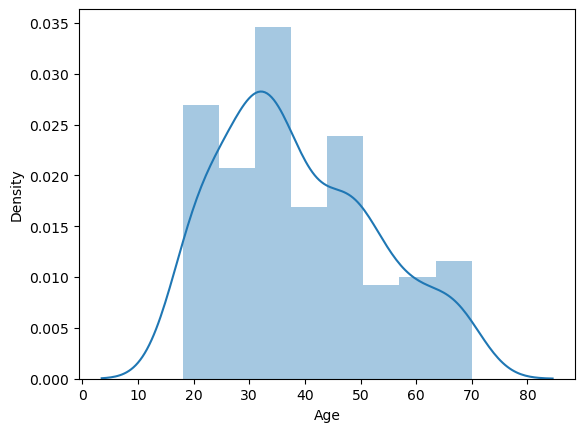

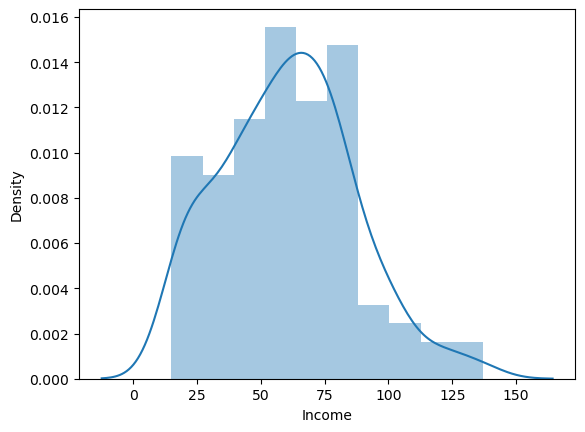

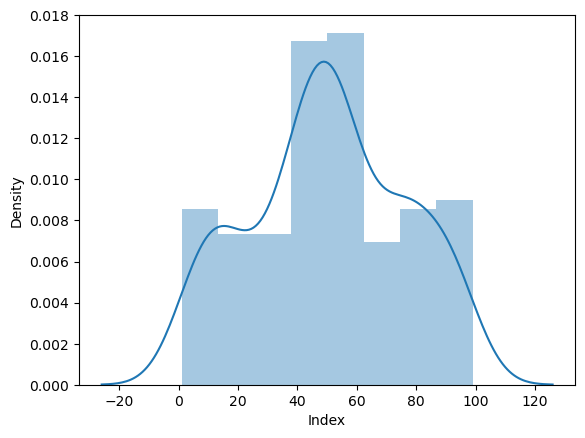

In [4]:
import warnings
warnings.filterwarnings("ignore")

#summarise numerical characteristics of datasets

num_cols = ['Age', 'Income', 'Index']

for i in num_cols: 
    matplotlib.pyplot.figure()
    seaborn.distplot(data[i])

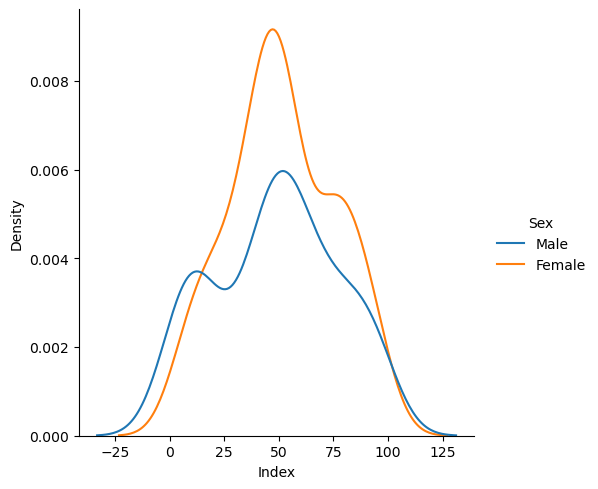

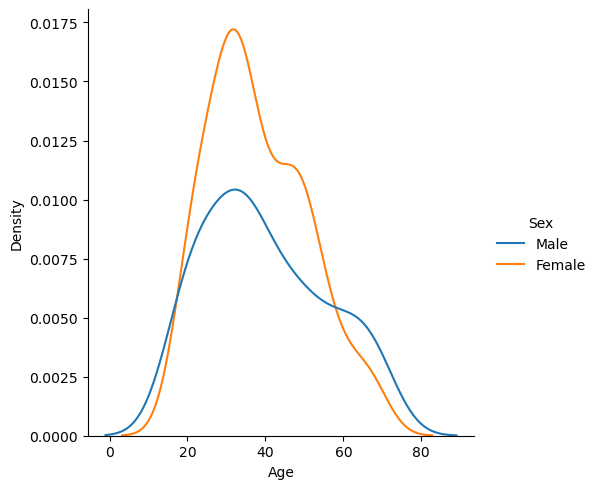

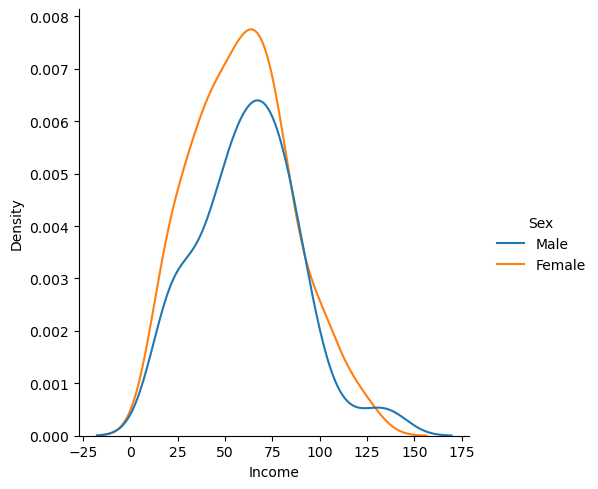

In [5]:
#kde plots by Gender

seaborn.displot(data.reset_index(drop=True), x='Index', kind="kde", hue='Sex')
seaborn.displot(data.reset_index(drop=True), x='Age', kind="kde", hue='Sex')
seaborn.displot(data.reset_index(drop=True), x='Income', kind="kde", hue='Sex')




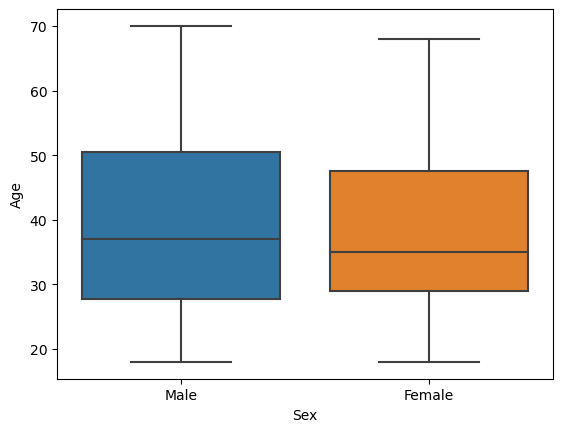

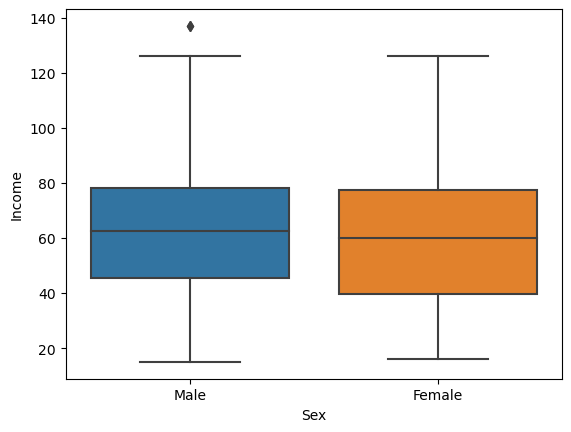

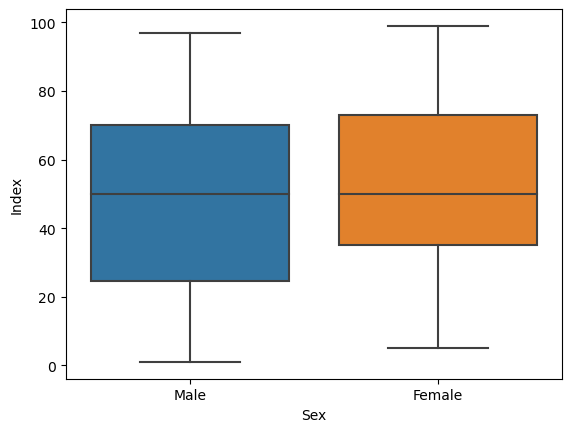

In [6]:
#boxplots 
num_cols = ['Age', 'Income', 'Index']

for i in num_cols: 
    matplotlib.pyplot.figure()
    seaborn.boxplot(data = data, x='Sex', y= data[i])

In [7]:
#customers seem to be majority female 
data['Sex'].value_counts(normalize = True)

Sex
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Income', ylabel='Index'>

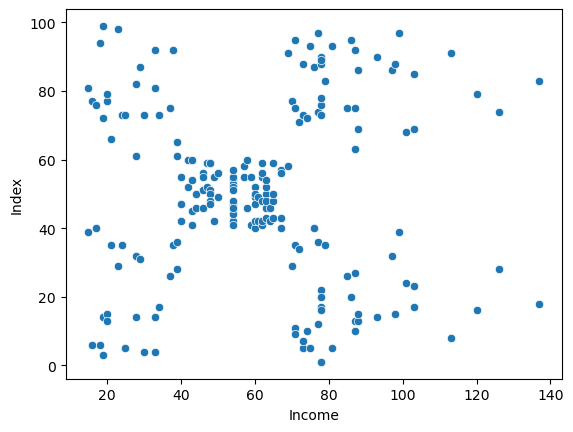

In [8]:
#scatterplot

seaborn.scatterplot(data=data, x = 'Income', y = 'Index')

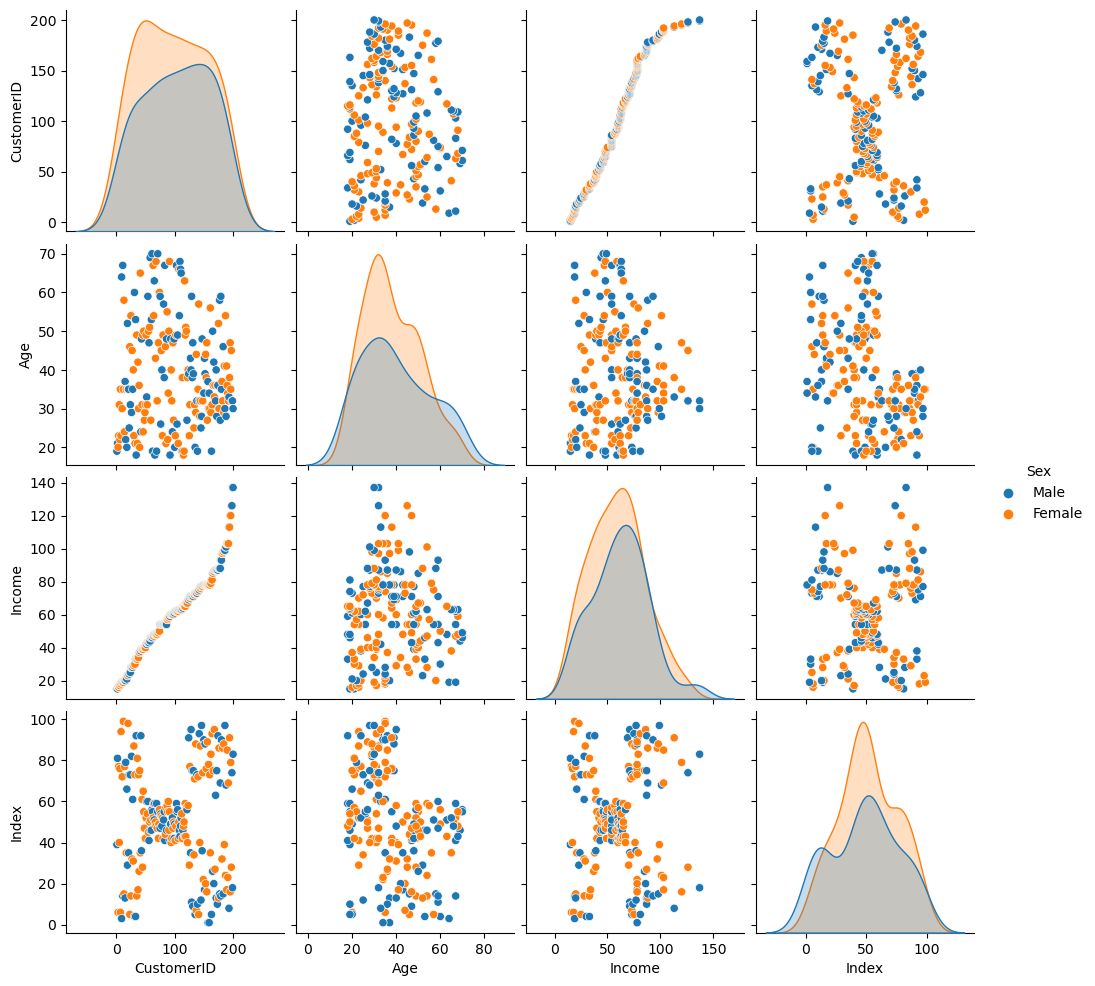

In [9]:
#there appear to be about ~5 clusters

#let's do this for all pairs of variables
#data = data.drop('CustomerID', axis = 1)

seaborn.pairplot(data=data, hue='Sex')

In [10]:
#data mean values grouped by Sex

data.groupby(['Sex'])[num_cols].mean()


,Age,Income,Index
Sex,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: ylabel='Sex-None'>

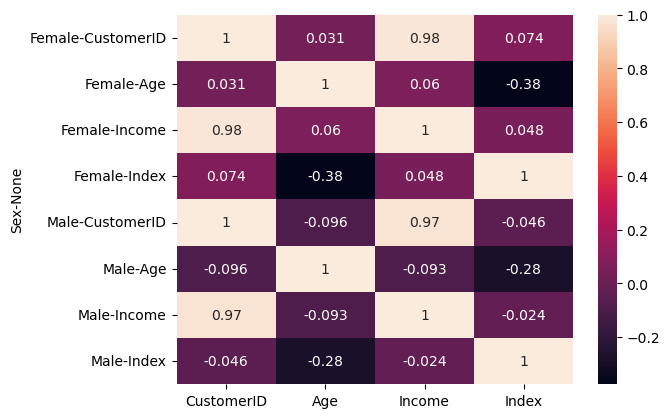

In [11]:
#correlations

seaborn.heatmap(data.groupby(['Sex']).corr(), annot=True)

In [12]:
# K-Means Clustering

km0 = KMeans()

In [13]:
km0.fit(data[['Income']])

KMeans()

In [14]:
km0.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
       0, 0])

In [15]:
data['Income Labels'] = km0.labels_
data.head()

,CustomerID,Sex,Age,Income,Index,Income Labels
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [16]:
#univariate analysis around this first cluster

data['Income Labels'].value_counts()

Income Labels
3    40
1    36
2    30
4    30
6    26
7    16
5    14
0     8
Name: count, dtype: int64

In [17]:
#distance between centroids
km0.inertia_

2885.501892551892

In [18]:
#Elbow Method 

clinertia = []

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data[['Income']])
    clinertia.append(KM.inertia_)

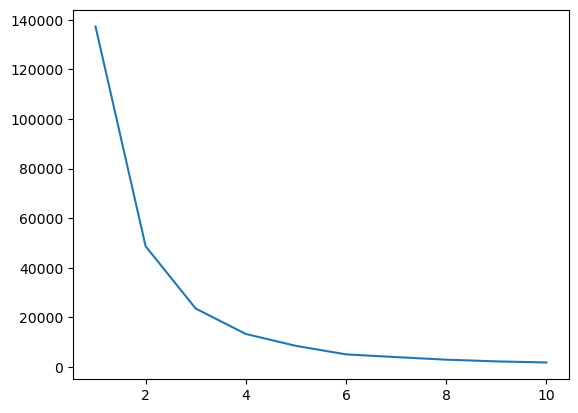

In [19]:
matplotlib.pyplot.plot(range(1,11), clinertia)

In [20]:
#elbow appears to turn at 3 

In [21]:
# K-Means Clustering with 3 clusters

km1 = KMeans(n_clusters=3)
km1.fit(data[['Income']])
data['Income Labels'] = km1.labels_
data['Income Labels'].value_counts()

Income Labels
0    92
2    72
1    36
Name: count, dtype: int64

In [22]:
data.groupby('Income Labels')[num_cols].mean()

,Age,Income,Index
Income Labels,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


In [23]:
# K-Means Clustering, Bivariate 

km2 = KMeans()
km2.fit(data[['Income', 'Index']])
data['Income and Index Labels'] = km2.labels_

In [24]:
#Elbow Method 

clinertia2 = []

for i in range(1,11):
    KM2 = KMeans(n_clusters=i)
    KM2.fit(data[['Income', 'Index']])
    clinertia2.append(KM2.inertia_) 

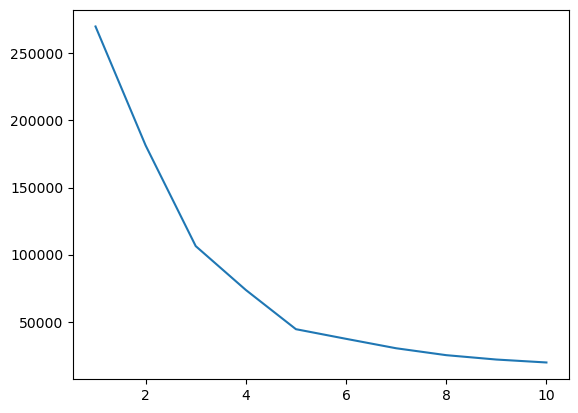

In [25]:
matplotlib.pyplot.plot(range(1,11), clinertia2)

In [26]:
# Bivariate K-Means Clustering with 5 clusters

km3 = KMeans(n_clusters=5)
km3.fit(data[['Income', 'Index']])
data['Income and Index Labels'] = km3.labels_
data['Income and Index Labels'].value_counts()

Income and Index Labels
0    81
2    39
1    35
3    23
4    22
Name: count, dtype: int64

In [27]:
clustercentres = pandas.DataFrame(km3.cluster_centers_)
clustercentres.columns = ['x', 'y']

<Axes: xlabel='Income', ylabel='Index'>

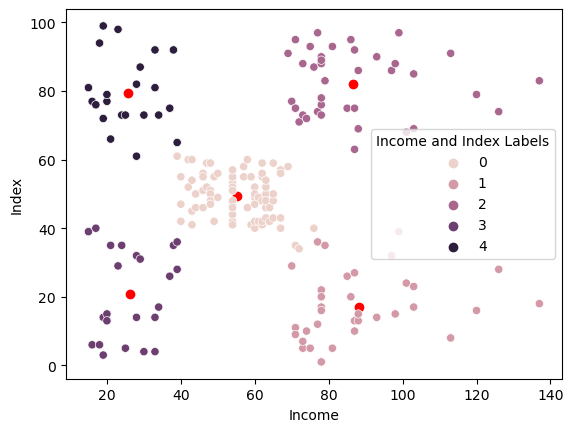

In [28]:
matplotlib.pyplot.scatter(x = clustercentres['x'], y = clustercentres['y'], c = 'red')
seaborn.scatterplot(data=data, x='Income', y='Index', hue = 'Income and Index Labels')

In [29]:
#by sex 
pandas.crosstab(data['Income and Index Labels'], data['Sex'], normalize = 'index')

Sex,Female,Male
Income and Index Labels,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [30]:
# descriptive statistics by cluster 
data.groupby('Income and Index Labels')[num_cols].mean()

,Age,Income,Index
Income and Index Labels,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [31]:
#Scale Data 
from sklearn.preprocessing import StandardScaler

In [32]:
#initialize 
scl = StandardScaler()

In [34]:
#K-Means clustering, multivariate
multidata = pandas.get_dummies(data)

In [37]:
multidata.head()

,CustomerID,Age,Income,Index,Income Labels,Income and Index Labels,Sex_Female,Sex_Male
0,1,19,15,39,2,3,False,True
1,2,21,15,81,2,4,False,True
2,3,20,16,6,2,3,True,False
3,4,23,16,77,2,4,True,False
4,5,31,17,40,2,3,True,False


In [38]:
multidata = multidata[['Income', 'Index', 'Age', 'Sex_Male']]

In [39]:
multidata = scl.fit_transform(multidata)

In [40]:
clinertia3 = []

for i in range(1,11):
    KM3 = KMeans(n_clusters=i)
    KM3.fit(multidata)
    clinertia3.append(KM3.inertia_) 
    


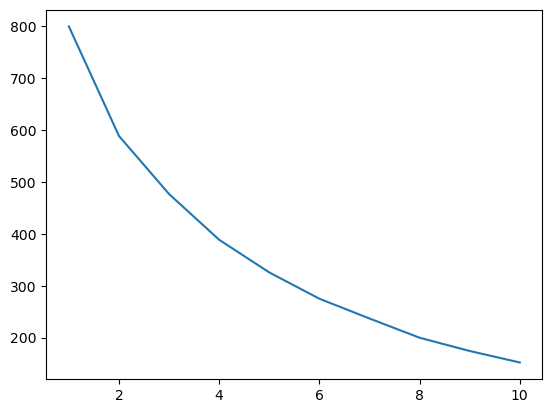

In [41]:
matplotlib.pyplot.plot(range(1,11), clinertia3)